This is include site0 & site1 & asu & site 4

In [1]:
# !pip install feather-format

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import gc
import pickle
import numpy as np
import pandas as pd
import random as rn
import matplotlib.pyplot as plt

from tqdm import tqdm
from datetime import datetime
import feather

# Impute leaked data

In [3]:
leaked_path = '../data/Leaked'
leaked = feather.read_dataframe(f'{leaked_path}/leaked_submission.feather')
print(leaked.shape)
leaked = leaked.dropna()
leaked.sort_values('row_id', inplace=True)
leaked.set_index('row_id', inplace=True)
print(leaked.shape)
print('There should be no rows droppped.')

(11937501, 3)
(11937501, 2)
There should be no rows droppped.


In [4]:
name = 'submission_blend_14'
path = '../data'
# submission = pd.read_csv(f"{path}/submission/{name}.csv")
submission = feather.read_dataframe(f"{path}/submission/{name}.feather")
submission.sort_values('row_id', inplace=True)
submission.set_index('row_id', inplace=True)

In [5]:
# submission['utc_time'] = leaked['utc_time']
# submission['building_id'] = leaked['building_id']
# submission['meter'] = leaked['meter']

In [6]:
# leaked['meter_reading'] = leaked_old['meter_reading']

In [7]:
# grouping = leaked['building_id'].astype(str) +'_'+\
#              leaked['utc_time'].dt.month.astype(str) +'_'+\
#              leaked['meter'].astype(str) 

# temp_df = leaked.groupby(grouping)['meter_reading'].apply(lambda x: int(np.percentile(x,99)))
# temp_df = temp_df.to_dict()

# modified_meter_reading = grouping.map(temp_df)

# leaked['meter_reading_edited'] = np.where(leaked['meter_reading']>modified_meter_reading,
#                       np.nan,
#                       leaked['meter_reading'])

In [9]:
# index = leaked[leaked['meter_reading_edited'].notna() & (leaked['meter_reading'].gt(0)|leaked['meter'].ne(0))].index
# predicted = np.log1p(submission.loc[index,'meter_reading'])
# real = np.log1p(leaked.loc[index,'meter_reading'])
# RMSLE = np.sqrt(np.mean(np.power(real-predicted,2)))
# print(RMSLE.round(4))

In [10]:
# s = pd.Series(np.power(real-predicted,2))\
#     .groupby([leaked.loc[index,'building_id'],leaked.loc[index,'meter']])\
#     .mean().sort_values(ascending=False)
# s.reset_index(drop=True).dropna().plot()
# plt.xlim(0,100)

In [11]:
# s = s.reset_index()
# s[s['meter'].eq(0)]['meter_reading'].reset_index(drop=True).plot()
# plt.xlim(0,30)

In [12]:
# plt.figure(figsize=(20,8))
# building_id = 224
# meter = 3
# train[train['building_id'].eq(building_id) & 
#      train['meter'].eq(meter)].set_index('utc_time')['meter_reading'].plot()
# leaked[leaked['building_id'].eq(building_id) & 
#       leaked['meter'].eq(meter)].set_index('utc_time')['meter_reading'].dropna().plot()
# submission[submission['building_id'].eq(building_id) & 
#           submission['meter'].eq(meter)].set_index('utc_time')['meter_reading'].plot()

# # plt.ylim(0,12000)
# plt.show()

Measure RMSLE

In [13]:
index = leaked[leaked['meter_reading'].gt(0)].index
predicted = np.log1p(submission.loc[index,'meter_reading'])
real = np.log1p(leaked.loc[index,'meter_reading'])
RMSLE = np.sqrt(np.mean(np.power(real-predicted,2)))
print(RMSLE.round(4))

0.5703


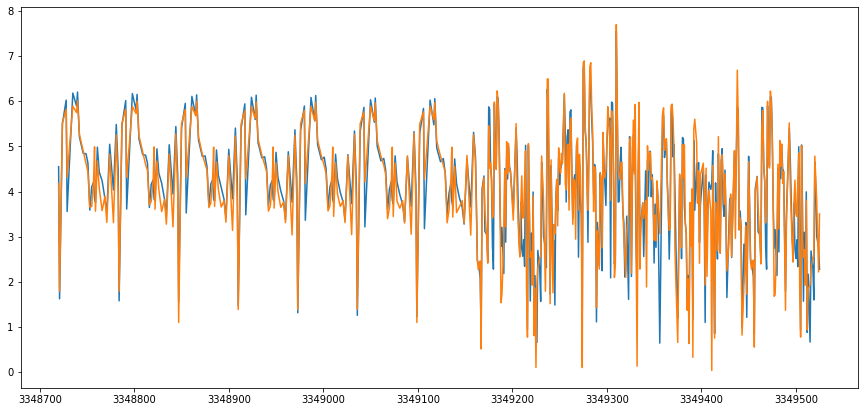

In [14]:
plt.figure(figsize=(15,7))
start = 3000000
end = start + 500
plt.plot(predicted[start:end])
plt.plot(real[start:end])
plt.show()

Impute and save

In [15]:
%%time
submission.loc[leaked.index,'meter_reading'] = leaked['meter_reading'].values
submission['meter_reading'] = submission['meter_reading'].round(4)
submission.head()

CPU times: user 1.79 s, sys: 325 ms, total: 2.11 s
Wall time: 1.74 s


,meter_reading
row_id,
0,173.3703
1,53.5127
2,6.1430
3,101.7015
4,1141.2407


In [16]:
submission[['meter_reading']].to_csv(f'{path}/submission/{name}_imputed.csv')

# Verification

In [ ]:
# building_mapping = feather.read_dataframe(f'{path}/Prepared_data/building_site_mapping.feather')
# # leaked['building_id'] = building_mapping.loc[leaked.index,'building_id'].values
# leaked['predicted'] = submission.loc[leaked.index,'meter_reading'].values
# leaked['diff'] = (leaked['predicted'] - leaked['meter_reading']).abs()
# leaked.groupby('building_id')['diff'].mean().sort_values(ascending=False).head(20)